In [776]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, roc_curve, auc
import itertools
from itertools import cycle
from sklearn import metrics
from scipy import interp
import os
import shutil
from keras import backend as K
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [777]:
#import PIL
#import os
#from PIL import Image

#f = r'E://box3/G/resized/128/train/G3'

#os.listdir(f)

#for file in os.listdir(f):
#    f_img = f+"/"+file
#    img = Image.open(f_img)
#    img = img.resize((80,64))
#    img.save(f_img)

In [778]:
img_width, img_height = 64, 64

train_data_dir = 'G_generated/train'
#validation_data_dir = '../input/main-dataset/main_dataset/validation'
test_data_dir = 'G_generated/test'
nb_train_samples = 500
nb_validation_samples = 300
epochs = 180
batch_size = 100
#regularizer = tf.keras.regularizers.l2(0.01,)

#if K.image_data_format() == 'channels_first':
#  input_shape = (3, img_width, img_height)
#else:
input_shape = (img_width, img_height, 3)

In [779]:
train_datagen = ImageDataGenerator(
    #rescale = 1./255,
    #shear_range = 0.3,
    #zoom_range = 0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #horizontal_flip = True
)

test_datagen = ImageDataGenerator(#rescale = 1./255
)

In [780]:
train_batches = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    #classes=['EOISINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'],
    class_mode = 'categorical')

Found 555 images belonging to 3 classes.


In [781]:
test_batches = test_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_width, img_height),
    batch_size = 100,
    #color_mode = 'grayscale',
    class_mode = 'categorical')

Found 300 images belonging to 3 classes.


In [782]:
def plots(ims, figsize=(12,6), rows=None, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows +1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [783]:
imgs, labels = next(train_batches)

In [784]:
#model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [785]:
#Eoisinophil=8[1.0.0.0],Lymphocyte=4[0.1.0.0],monocyte=2[0.0.1.0],neutrophil=1[0.0.0.1]-->Labels
#plots(imgs, rows=4, titles=labels)

In [786]:
#model = Sequential()

#model.add(Conv2D(32, kernel_size=(11,11), strides= 4,
#                        padding= 'valid', activation= 'relu',
#                        input_shape= input_shape,
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Conv2D(256, kernel_size=(5,5), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))
#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None)) 

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(384, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(Conv2D(256, kernel_size=(3,3), strides= 1,
#                        padding= 'same', activation= 'relu',
#                        kernel_initializer= 'he_normal'))

#model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
#                              padding= 'valid', data_format= None))

#model.add(Flatten())
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(4096, activation= 'relu'))
#model.add(Dense(1000, activation= 'relu'))
#model.add(Dense(4, activation= 'softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [787]:
#model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
#model.add(Conv2D(filters=128, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())

#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3, activation='softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

In [788]:
#model = Sequential()

#model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=64, kernel_size=(3,3),strides=(1,1), activation='relu', input_shape=(64,64,3)))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())
#model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
#model.add(BatchNormalization())         
#model.add(Flatten())
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(4096, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3,activation='softmax'))

#model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
#                    loss='categorical_crossentropy',
#                    metrics=['accuracy'])

#model.summary()

In [789]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))

model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_314 (Conv2D)         (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_158 (MaxPooli  (None, 31, 31, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_315 (Conv2D)         (None, 29, 29, 64)        18496     
                                                                 
 conv2d_316 (Conv2D)         (None, 27, 27, 64)        36928     
                                                                 
 max_pooling2d_159 (MaxPooli  (None, 13, 13, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_317 (Conv2D)         (None, 11, 11, 128)     

In [790]:
%%time
h = model.fit_generator(
    train_batches,
    steps_per_epoch = 6,
    epochs = epochs,
    validation_data = test_batches,
    validation_steps = nb_validation_samples // batch_size,
    #callbacks=[
    #    tf.keras.callbacks.ModelCheckpoint(filepath = '/kaggle/working/model_{val_accuracy:.3f}.h5', save_best_only=True,
    #                                      save_weights_only=False, monitor='val_accuracy')
    #]
)

Epoch 1/180


c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


6/6 [==============================] - 7s 770ms/step - loss: 35.1922 - accuracy: 0.4901 - val_loss: 0.7047 - val_accuracy: 0.3333
Epoch 2/180
6/6 [==============================] - 4s 699ms/step - loss: 0.6212 - accuracy: 0.6324 - val_loss: 0.7175 - val_accuracy: 0.3333
Epoch 3/180
6/6 [==============================] - 4s 648ms/step - loss: 0.5603 - accuracy: 0.6324 - val_loss: 0.7115 - val_accuracy: 0.3333
Epoch 4/180
6/6 [==============================] - 4s 667ms/step - loss: 0.5591 - accuracy: 0.6324 - val_loss: 0.6767 - val_accuracy: 0.3333
Epoch 5/180
6/6 [==============================] - 4s 653ms/step - loss: 0.5639 - accuracy: 0.6324 - val_loss: 0.7402 - val_accuracy: 0.3333
Epoch 6/180
6/6 [==============================] - 4s 658ms/step - loss: 0.5629 - accuracy: 0.6324 - val_loss: 0.6794 - val_accuracy: 0.3333
Epoch 7/180
6/6 [==============================] - 4s 670ms/step - loss: 0.6091 - accuracy: 0.6324 - val_loss: 0.8383 - val_accuracy: 0.3333
Epoch 8/180
6/6 [=======

Epoch 59/180
6/6 [==============================] - 4s 671ms/step - loss: 0.5608 - accuracy: 0.5856 - val_loss: 0.7243 - val_accuracy: 0.3333
Epoch 60/180
6/6 [==============================] - 4s 646ms/step - loss: 0.5053 - accuracy: 0.6324 - val_loss: 0.7429 - val_accuracy: 0.3333
Epoch 61/180
6/6 [==============================] - 4s 695ms/step - loss: 0.4883 - accuracy: 0.6324 - val_loss: 0.7726 - val_accuracy: 0.3467
Epoch 62/180
6/6 [==============================] - 4s 650ms/step - loss: 0.5153 - accuracy: 0.6342 - val_loss: 0.6939 - val_accuracy: 0.3333
Epoch 63/180
6/6 [==============================] - 4s 653ms/step - loss: 0.4757 - accuracy: 0.6721 - val_loss: 0.6425 - val_accuracy: 0.4500
Epoch 64/180
6/6 [==============================] - 4s 638ms/step - loss: 0.5063 - accuracy: 0.6649 - val_loss: 0.6641 - val_accuracy: 0.3500
Epoch 65/180
6/6 [==============================] - 4s 641ms/step - loss: 0.5245 - accuracy: 0.6090 - val_loss: 0.6874 - val_accuracy: 0.3367
Epoch 

6/6 [==============================] - 4s 658ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.1774 - val_accuracy: 0.6267
Epoch 117/180
6/6 [==============================] - 4s 665ms/step - loss: 9.0658e-04 - accuracy: 1.0000 - val_loss: 2.4738 - val_accuracy: 0.6433
Epoch 118/180
6/6 [==============================] - 4s 715ms/step - loss: 3.3999e-04 - accuracy: 1.0000 - val_loss: 2.6241 - val_accuracy: 0.6467
Epoch 119/180
6/6 [==============================] - 4s 683ms/step - loss: 2.2892e-04 - accuracy: 1.0000 - val_loss: 2.8048 - val_accuracy: 0.6433
Epoch 120/180
6/6 [==============================] - 4s 644ms/step - loss: 1.5919e-04 - accuracy: 1.0000 - val_loss: 2.8464 - val_accuracy: 0.6467
Epoch 121/180
6/6 [==============================] - 4s 707ms/step - loss: 1.1579e-04 - accuracy: 1.0000 - val_loss: 2.9401 - val_accuracy: 0.6433
Epoch 122/180
6/6 [==============================] - 4s 650ms/step - loss: 8.6610e-05 - accuracy: 1.0000 - val_loss: 3.0693 - val_accura

6/6 [==============================] - 4s 649ms/step - loss: 1.9992e-06 - accuracy: 1.0000 - val_loss: 4.6365 - val_accuracy: 0.6367
Epoch 173/180
6/6 [==============================] - 4s 667ms/step - loss: 1.9137e-06 - accuracy: 1.0000 - val_loss: 4.6462 - val_accuracy: 0.6333
Epoch 174/180
6/6 [==============================] - 4s 661ms/step - loss: 1.8471e-06 - accuracy: 1.0000 - val_loss: 4.6868 - val_accuracy: 0.6367
Epoch 175/180
6/6 [==============================] - 4s 658ms/step - loss: 1.6754e-06 - accuracy: 1.0000 - val_loss: 4.6812 - val_accuracy: 0.6367
Epoch 176/180
6/6 [==============================] - 4s 694ms/step - loss: 1.6975e-06 - accuracy: 1.0000 - val_loss: 4.6897 - val_accuracy: 0.6333
Epoch 177/180
6/6 [==============================] - 4s 704ms/step - loss: 1.5270e-06 - accuracy: 1.0000 - val_loss: 4.7264 - val_accuracy: 0.6367
Epoch 178/180
6/6 [==============================] - 4s 671ms/step - loss: 1.4766e-06 - accuracy: 1.0000 - val_loss: 4.7344 - val_ac

In [791]:
test_imgs, test_labels = next(test_batches)
#plots(test_imgs, rows=10, titles=test_labels)

In [792]:
rounded_labels = np.argmax(test_labels, axis=-1)

In [793]:
model.save('model_0.92015612.h5')
test_model = load_model('model_0.92015612.h5')

In [794]:
predictions = test_model.predict_generator(test_batches, steps=1, verbose=0)

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [795]:
predictions

array([[7.83425273e-16, 1.73282897e-05, 9.99983251e-01],
       [1.92588404e-13, 1.00000000e+00, 1.03444737e-14],
       [5.35818339e-19, 1.34342718e-10, 1.00000000e+00],
       [9.81704775e-19, 7.01040836e-10, 1.00000000e+00],
       [1.67016451e-19, 2.11989559e-09, 1.00000000e+00],
       [4.16733703e-10, 1.00000000e+00, 9.14398904e-11],
       [1.00000000e+00, 1.67465773e-13, 2.38304171e-30],
       [1.00000000e+00, 1.32320691e-18, 1.57098990e-30],
       [6.78242762e-19, 1.00000000e+00, 6.07933160e-20],
       [0.00000000e+00, 1.87111275e-23, 1.00000000e+00],
       [1.93199491e-32, 5.35064987e-14, 1.00000000e+00],
       [1.90853345e-31, 4.90015235e-14, 1.00000000e+00],
       [2.05384367e-08, 3.52982839e-04, 9.99523997e-01],
       [5.53172525e-13, 1.61311584e-06, 9.99997973e-01],
       [9.42088278e-20, 1.00000000e+00, 2.79945933e-08],
       [2.73326673e-14, 9.99991477e-01, 1.04267501e-05],
       [8.07130421e-28, 2.85982824e-05, 9.99979496e-01],
       [8.09056225e-15, 1.00000

In [796]:
rounded_prediction = np.argmax(predictions, axis=-1)

In [797]:
for i in rounded_prediction:
    print(i)

2
1
2
2
2
1
0
0
1
2
2
2
2
2
1
1
2
1
2
0
0
1
1
1
2
2
2
2
1
2
1
2
1
2
1
2
2
2
2
1
0
2
1
2
0
2
1
2
1
2
1
2
2
1
2
1
2
2
2
1
1
2
2
2
2
1
1
2
1
2
2
0
1
0
1
1
1
2
2
0
0
1
1
2
1
0
1
0
2
1
2
1
2
2
1
2
0
2
2
0


In [798]:
cm = confusion_matrix(y_true=rounded_labels, y_pred=rounded_prediction)

In [799]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[14 10  8]
 [ 0 23 10]
 [ 0  3 32]]


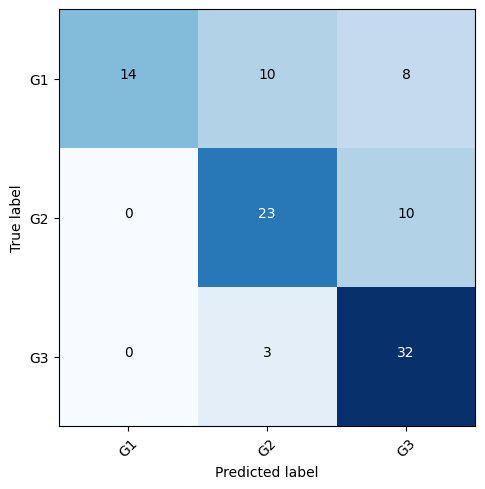

In [800]:
cm_plot_labels = ['G1','G2', 'G3']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='')

c:\users\terraform\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


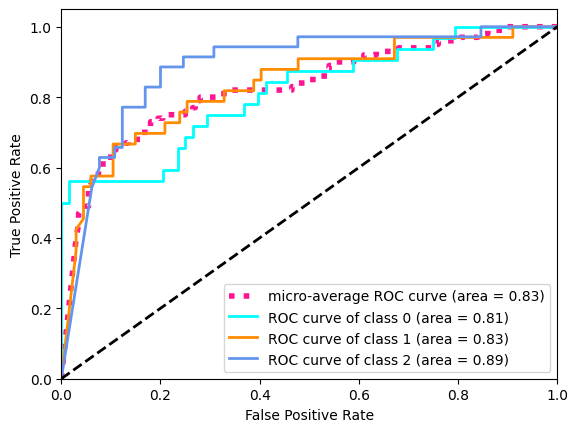

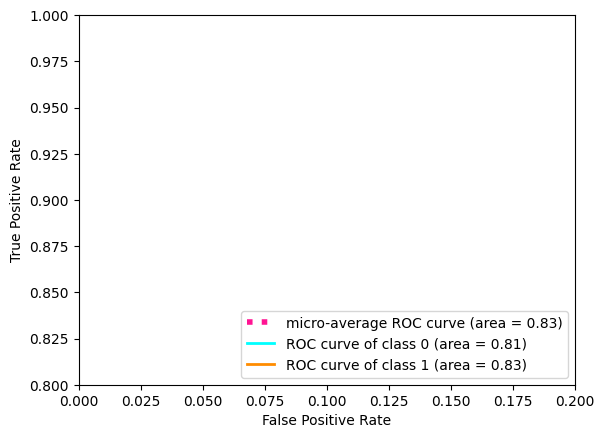

In [801]:
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(2)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 2

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)



colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)



colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(2), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()



In [802]:
from sklearn.metrics import classification_report

In [803]:
print(classification_report(y_true=rounded_labels, y_pred=rounded_prediction))

              precision    recall  f1-score   support

           0       1.00      0.44      0.61        32
           1       0.64      0.70      0.67        33
           2       0.64      0.91      0.75        35

    accuracy                           0.69       100
   macro avg       0.76      0.68      0.68       100
weighted avg       0.75      0.69      0.68       100



In [804]:
score = metrics.log_loss(test_labels,predictions)
print("Log loss score: {}".format(score))

Log loss score: 6.322331104152827


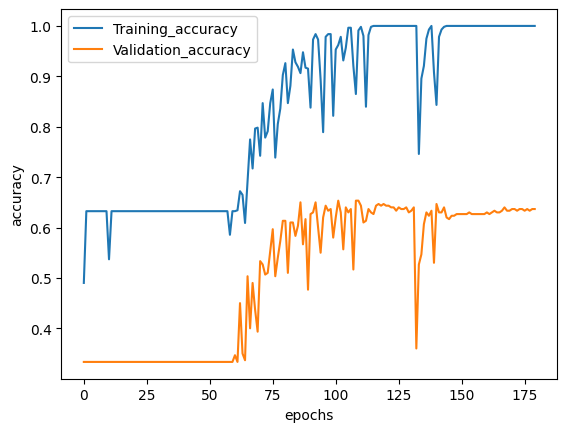

In [805]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

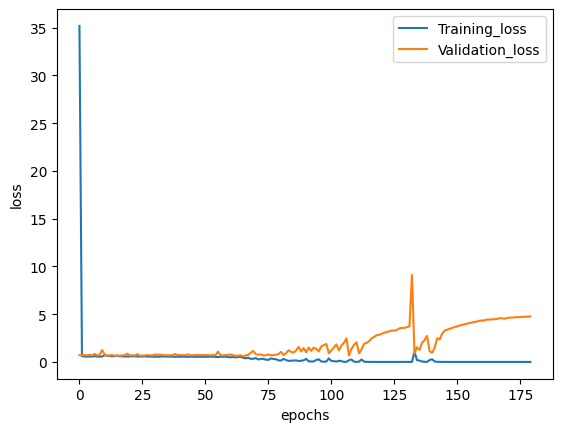

In [806]:
accs = h.history['loss']
val_accs = h.history['val_loss']

plt.plot(range(len(accs)),accs, label = 'Training_loss')
plt.plot(range(len(accs)),val_accs, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()